Сначала SQL-запросом создадим таблицы, с которыми будем работать в python. Запросы выполняются непосредственно в базе данных.

In [ ]:
SELECT [ISIN], [CPN] INTO [risks].[dbo].[coupon_data]
FROM [risks].[dbo].[base_prices]
WHERE [CPN] != ' ';
UPDATE [risks].[dbo].[coupon_data]
SET [CPN] = REPLACE([CPN], ',', '.');
ALTER TABLE [risks].[dbo].[coupon_data] ALTER COLUMN [CPN] float NOT NULL;
GO
#средний размер купоны
SELECT [ISIN], AVG([CPN]) as coupon
INTO [risks].[dbo].[coupon_data2]
FROM [risks].[dbo].[coupon_data]
GROUP BY [ISIN]
GO
#таблица для работы
SELECT [ISIN, RegCode, NRDCode], [IssuerName], [SumMarketVal], [EndMtyDate], [BegDistDate], [SecurityType], [CouponType], [HaveOffer], [CouponPerYear], [Basis], [FaceFTName], [AmortisedMty], [FaceValue], [coupon]
INTO [risks].[dbo].[bond_information]
FROM [risks].[dbo].[bond_discription] LEFT JOIN [risks].[dbo].[coupon_data2]
ON [risks].[dbo].[bond_discription].[ISIN, RegCode, NRDCode] = [risks].[dbo].[coupon_data2].[ISIN]
WHERE [IssuerName] !=' '
GO

Для выполнения следующих пунктов понадобится MS SQL Sevrer, ODBC Driver 17 for SQL Serve, Python 3.7 (Jupyter notebook).
Необходимо настроить подключение Python к базе по ODBC. Для этого необходимо установить расширение pyodbc, прописав в командной строке:
pip install pyodbc
Если ранее не было создано имя для подключения к серверу, необходимо создать его через вкладку Безопасность-Имена для входа и использовать эти данные для подключения к базе данных. 

In [79]:
import pandas as pd
import pyodbc 
server = 'HOME\SQLEXPRESS' 
database = 'risks' 
username = 'IT' 
password = '1111' 
conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)


Выполним запрос на вывод списка эмитентов

In [66]:
df = pd.read_sql("SELECT [IssuerName] FROM [risks].[dbo].[bond_information] GROUP BY [IssuerName]", conn)
df

,IssuerName
0,4finance S.A
1,Ak Bars Luxembourg
2,Alfa Bond Issuance
3,Alfa Holding Issuance
4,"Alrosa Finance, Luxemb."
5,BKM Finance
6,Borets Finance
7,BrokerCreditService SP
8,Brunswick Rail Finance
9,Caterpillar InternFinance


Постороим bar plot с срочной структурой погашения облигаций нашего эмитента. По оси x будет время в годах, а по оси ординат - объем.

In [107]:
OurIssuer = input('Введите имя эмитента ')  

РЖД


In [126]:
OurDate = input('Введите дату в формате YYYY-MM-DD: ')

Введите дату в формате YYYY-MM-DD: 2015-01-01


In [127]:
OurDate=pd.to_datetime(OurDate)

In [128]:
SQLQuery2 = (""" 
SELECT * FROM [risks].[dbo].[bond_information] 
""")
bonds = pd.read_sql(SQLQuery2, conn)
OurBonds = bonds[(bonds['EndMtyDate'] > OurDate) & (bonds['BegDistDate'] < OurDate) & (bonds['IssuerName'] == OurIssuer) & (bonds['FaceFTName'] == 'RUB')]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org

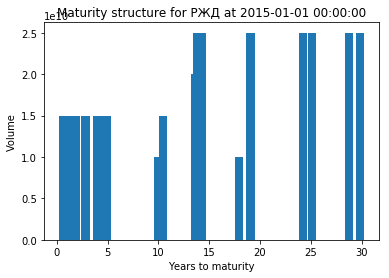

In [129]:
OurBonds.insert(5,'OurDate',OurDate)
OurBonds['time_to_maturity'] = OurBonds['EndMtyDate'] - OurBonds['OurDate']
import numpy as np
OurBonds['time_to_maturity']= (OurBonds['time_to_maturity'] / np.timedelta64(1, 'D')).astype(int)
OurBonds['time_to_maturity'] = OurBonds['time_to_maturity']/365
import matplotlib.pyplot as plt
Volume = OurBonds['SumMarketVal']
Days_to_maturity=OurBonds['time_to_maturity']
plt.bar(Days_to_maturity,Volume, width = 0.8, align = 'edge')
plt.xlabel('Years to maturity')
plt.ylabel('Volume')
plt.title('Maturity structure for '+str(OurIssuer) +' at ' + str(OurDate))
plt.show()

Постороение круговой диаграммы. Необходимо сначала разбить данные на три группы по срочности. Определим те облигации, срок погашения которых меньше 5 и более 10 лет.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


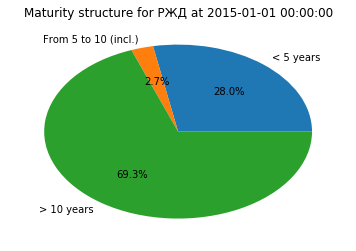

In [130]:
OurBonds['<5'] = OurBonds['time_to_maturity'] < 5
OurBonds['>10'] = OurBonds['time_to_maturity'] > 10
a = OurBonds.loc[OurBonds['<5']== True, 'SumMarketVal'].sum()
b = OurBonds.loc[(OurBonds['<5']== False) & ((OurBonds['>10']== False)), 'SumMarketVal'].sum()
c = OurBonds.loc[OurBonds['>10']== True, 'SumMarketVal'].sum()
Volumes = [a,b,c]
Groups = ['< 5 years', 'From 5 to 10 (incl.)', '> 10 years']
plt.pie( Volumes, labels= Groups, shadow=False, autopct='%1.1f%%',)
plt.title('Maturity structure for '+str(OurIssuer) +' at ' + str(OurDate))
plt.show()


Выведем облигации эмитента с заданными параметрами

In [113]:
OurBonds

,"ISIN, RegCode, NRDCode",IssuerName,SumMarketVal,EndMtyDate,BegDistDate,OurDate,SecurityType,CouponType,HaveOffer,CouponPerYear,Basis,FaceFTName,AmortisedMty,FaceValue,coupon,time_to_maturity,<5,>10
1054,RU000A0JQ5Q5,РЖД,1.500000e+10,2019-05-16,2009-05-30,2017-02-17,Корп,Переменный,1.0,2.0,act/365,RUB,0.0,1000.0,43.214515,2.241096,True,False
1062,RU000A0JQ656,РЖД,1.500000e+10,2017-06-05,2009-06-17,2017-02-17,Корп,Переменный,1.0,2.0,act/365,RUB,0.0,1000.0,42.903457,0.295890,True,False
1088,RU000A0JQ7W9,РЖД,1.500000e+10,2018-07-16,2009-07-29,2017-02-17,Корп,Переменный,1.0,2.0,act/365,RUB,0.0,1000.0,47.466551,1.408219,True,False
1089,RU000A0JQ7X7,РЖД,1.500000e+10,2019-07-15,2009-07-29,2017-02-17,Корп,Индексируемый,1.0,2.0,act/365,RUB,0.0,1000.0,51.884933,2.405479,True,False
1090,RU000A0JQ7Z2,РЖД,1.000000e+10,2024-07-08,2009-07-29,2017-02-17,Корп,Переменный,1.0,2.0,act/365,RUB,0.0,1000.0,44.180036,7.391781,False,False
1229,RU000A0JQRD9,РЖД,1.500000e+10,2025-01-16,2010-02-06,2017-02-17,Корп,Переменный,1.0,2.0,act/365,RUB,0.0,1000.0,47.103915,7.917808,False,False
1834,RU000A0JSGV0,РЖД,1.000000e+10,2032-06-25,2012-07-22,2017-02-17,Корп,Индексируемый,1.0,2.0,act/365,RUB,0.0,1000.0,51.141486,15.361644,False,True
2102,RU000A0JTU85,РЖД,2.000000e+10,2028-03-21,2013-04-11,2017-02-17,Корп,Переменный,1.0,2.0,act/365,RUB,0.0,1000.0,40.889921,11.095890,False,True
2140,RU000A0JTY57,РЖД,2.500000e+10,2043-04-29,2013-06-07,2017-02-17,Корп,Индексируемый,0.0,2.0,act/365,RUB,0.0,1000.0,49.140747,26.210959,False,True
2170,RU000A0JTZM7,РЖД,2.500000e+10,2028-06-08,2013-06-29,2017-02-17,Корп,Индексируемый,0.0,2.0,act/365,RUB,0.0,1000.0,49.289875,11.312329,False,True


Запросим интересующую облигацию

In [138]:
OurISIN=input('введите ISIN одной из облигаций эмитента ') 

введите ISIN одной из облигаций эмитента RU000A0JQ4F1


In [143]:
OurBond = OurBonds[OurBonds['ISIN, RegCode, NRDCode'] == OurISIN]
OurBond

,"ISIN, RegCode, NRDCode",IssuerName,SumMarketVal,EndMtyDate,BegDistDate,OurDate,SecurityType,CouponType,HaveOffer,CouponPerYear,Basis,FaceFTName,AmortisedMty,FaceValue,coupon,time_to_maturity,<5,>10


Тип данной облигации, вид купона и наличии оферт.

In [144]:
OurBond [['ISIN, RegCode, NRDCode', 'SecurityType' ,'CouponType', 'HaveOffer']]

,"ISIN, RegCode, NRDCode",SecurityType,CouponType,HaveOffer


Структура платежей по облигации, оставшихся от выбранной даты до даты погашения, если облигация имеет постоянный купон, не имеет аферты и не является амортизируемой.

In [145]:
if OurBond['CouponType'].all() == 'Постоянный' and OurBond['HaveOffer'].all() == 0 and OurBond['AmortisedMty'].all() == 0:
    structure = pd.DataFrame(data={'date': [], 'payment': []})
    from datetime import datetime, timedelta
    j = OurBond.loc[:,'EndMtyDate'].astype(object).all()
    i=0
    structure.at[i, 'date'] = j
    structure.at[i, 'payment'] = OurBond['coupon'] + OurBond['FaceValue']
    while j >= OurBond['OurDate'].astype(object).all():
        j -= timedelta(days=365/OurBond.loc[:,'CouponPerYear'].sum())
        i += 1
        structure.at[i, 'date'] = j
        structure.at[i, 'payment'] = OurBond['coupon']
    print(structure)
else:
    print('Облигация не подходит: тип ее купона не является постоянным, в облигацию встроена аферта или же она является амортизируемой')

Облигация не подходит: тип ее купона не является постоянным, в облигацию встроена аферта или же она является амортизируемой


Выведем структуру платежей, если это возможно (для большинства облигаций не отображается т.к. не хватает данных)

In [146]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.bar(structure['date'].values,structure['payment'].values, width= 10)
plt.xlabel='Дата платежа'
plt.ylabel='Размер платежа'
plt.title('Структура платежей по облигации с ISIN '+str(OurISIN)+' эмитента '+str(OurIssuer) +' на дату ' + str(OurDate))
fig.autofmt_xdate()
plt.show()

NameError: name 'structure' is not defined